#  Heart Diesease Prediction Using Logistic Regression 


###  Importing all important libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
# import statsmodels.api as s

In [ ]:
import numpy as np
df = pd.read_csv('heart_disease.csv')
# df = pd.read_csv('heart_disease_new.csv')
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


### Dropping Null Values 

In [ ]:
# mean = df["Ca"].mean()
df.dropna(inplace=True)
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


In [ ]:
# df["Ca"].fillna(value=mean,inplace=True)
# df.shape

In [ ]:
#val = df["Thal"].mode()
#print(val[0])

In [ ]:
# df["Thal"].fillna(value=val[0],inplace=True)

###  Check any values are missing

In [ ]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [ ]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


### Transforming non-numeric values

In [ ]:
from sklearn.preprocessing import LabelEncoder
# labelencoder_Y = LabelEncoder()
le = LabelEncoder()
le_heart_disease = df
le_heart_disease.AHD = le.fit_transform(le_heart_disease.AHD)
# df.AHD =  labelencoder_Y.fit_transform(df.AHD)
# df
# labelencoder_Y.fit_transform(df.AHD)
# labelencoder_Y = df.fit_transform(df.AHD)

In [ ]:
df.to_csv("without_na.csv")

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
df.shape

(297, 14)

### using iloc

In [ ]:
x = df.iloc[:,:-1]
print(x)
y = df.iloc[:,-1]
y

     Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
1     63    1       typical     145   233    1        2    150      0   
2     67    1  asymptomatic     160   286    0        2    108      1   
3     67    1  asymptomatic     120   229    0        2    129      1   
4     37    1    nonanginal     130   250    0        0    187      0   
5     41    0    nontypical     130   204    0        2    172      0   
..   ...  ...           ...     ...   ...  ...      ...    ...    ...   
298   57    0  asymptomatic     140   241    0        0    123      1   
299   45    1       typical     110   264    0        0    132      0   
300   68    1  asymptomatic     144   193    1        0    141      0   
301   57    1  asymptomatic     130   131    0        0    115      1   
302   57    0    nontypical     130   236    0        2    174      0   

     Oldpeak  Slope   Ca        Thal  
1        2.3      3  0.0       fixed  
2        1.5      2  3.0      normal  
3     

1      0
2      1
3      1
4      0
5      0
      ..
298    1
299    1
300    1
301    1
302    1
Name: AHD, Length: 297, dtype: int32

### Converting categorial data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder()
x=onehotencoder.fit_transform(x).toarray()
x

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
# import numpy as np

# class LogisticRegression:

#     def __init__(self, learning_rate=0.001, n_iters=1000):
#         self.lr = learning_rate
#         self.n_iters = n_iters
#         self.weights = None
#         self.bias = None

#     def fit(self, X, y):
#         n_samples, n_features = X.shape

#         # init parameters
#         self.weights = np.zeros(n_features)
#         self.bias = 0

#         # gradient descent
#         for _ in range(self.n_iters):
#             # approximate y with linear combination of weights and x, plus bias
#             linear_model = np.dot(X, self.weights) + self.bias
#             # apply sigmoid function
#             y_predicted = self._sigmoid(linear_model)

#             # compute gradients
#             dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
#             db = (1 / n_samples) * np.sum(y_predicted - y)
#             # update parameters
#             self.weights -= self.lr * dw
#             self.bias -= self.lr * db

#     def predict(self, X):
#         linear_model = np.dot(X, self.weights) + self.bias
#         y_predicted = self._sigmoid(linear_model)
#         y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
#         return np.array(y_predicted_cls)

#     def _sigmoid(self, x):
#         return 1 / (1 + np.exp(-x))

In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn import datasets
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix


# # from logistic_regression import LogisticRegression
# #from regression import LogisticRegression

# # def accuracy(y_true, y_pred):
# #     accuracy = np.sum(y_true == y_pred) / len(y_true)
# #     return accuracy

# def accuracy(y_true, y_pred):
#     accuracy=np.sum(y_true==y_pred)/len(y_true)
#     return accuracy
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)
# #
# regressor = LogisticRegression(learning_rate=0.001, n_iters=100)
# regressor.fit(X_train, y_train)
# predictions = regressor.predict(X_test)
# print(predictions[0:10])
# print(y_test[0:10])
# # print(f">>>>>>>>{len(y_test)}>>>>>>>")


# print("LR classification accuracy:", accuracy(y_test, predictions))
# cm=confusion_matrix(predictions, y_test)
# print(cm)

### Plotting graphs

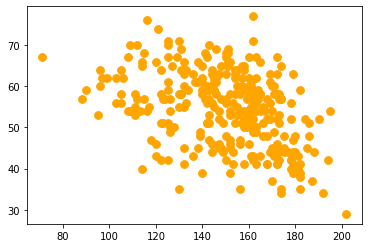

In [ ]:
 #Scatter Plot
plt.scatter("MaxHR","Age",data = df, color='orange', s=60)


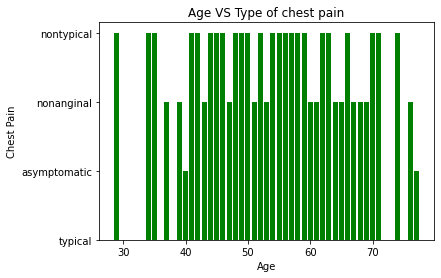

In [ ]:
 #Plotting graph
plt.bar("Age", "ChestPain", data = df, color = "green")
plt.xlabel("Age")
plt.ylabel("Chest Pain")
plt.title("Age VS Type of chest pain")
plt.show()



### Spiliiting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

### Applying logic

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# from logistic_regression import LogisticRegression
# from logistic_regression import LogisticRegression
# regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
regressor = LogisticRegression().fit(X_train, y_train)
# regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print(predictions[0:10])
print(y_test[0:10])
# print(f">>>>>>>>{len(y_test)}>>>>>>>")

[1 0 1 0 1 0 0 0 1 0]
65     1
246    1
178    1
4      0
30     1
116    0
134    0
16     0
55     1
217    0
Name: AHD, dtype: int32


### Checking accuracy of the model

In [ ]:
def accuracy(y_true, y_pred):
    accuracy=np.sum(y_true==y_pred)/len(y_true)
    return accuracy
print("LR classification accuracy:", accuracy(y_test, predictions))

LR classification accuracy: 0.85


# Model is created with an accuracy of 85%

In [ ]:
# from logistic_regression import LogisticRegression
# from sklearn.linear_model import LogisticRegression
# from logistic_regression import LogisticRegression

In [ ]:
# def accuracy(y_true, y_pred):
#     accuracy=np.sum(y_true==y_pred)/len(y_true)
#     return accuracy
# df = pd.read_csv('without_na.csv')
# X = np.asarray(df[['Age','Sex','ChestPain','RestBP','Chol','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope','Ca','Thal']])
# y = np.asarray(df['AHD'])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
# #
# regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
# regressor.fit(X_train, y_train)
# predictions = regressor.predict(X_test)
# print(predictions[0:10])
# print(y_test[0:10])
# # print(f">>>>>>>>{len(y_test)}>>>>>>>")


# print("LR classification accuracy:", accuracy(y_test, predictions))
# cm=confusion_matrix(predictions, y_test)
# print(cm)